In [4]:
__author__ = "@Tssp"
__date__   = "19/05/21"
import numpy as np
import matplotlib.pyplot as plt
import os
from utils.atomic_units import ao, vo, e, hbar, me, Eh, to
from decimal import Decimal
from utils.Energies_Analysis_utils import *
from matplotlib.ticker import AutoMinorLocator
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2
aur = (1 + np.sqrt(5)) / 2
aursize = (5*aur, 5)

In [5]:
delta = np.loadtxt('Simulations/delta_asc.dat', dtype=str)[:,0]
asc = np.loadtxt('Simulations/delta_asc.dat')[:,1]
delta = delta.tolist()
asc = asc.tolist()

In [6]:
# Parameters and Constants:
mass  = 7.0160040 * 1.66053873e-27 / me # a.u
alpha = 200 # a.u
lambd = 1000 * 1e-9 / ao # a.u
ky    = 2*np.pi/lambd
Iy    = 4993 * (1e4 / Eh * to * ao**2)
Vy    = alpha * Iy # a.u
Iy    = Vy/alpha
wy    = np.sqrt( 2 * Vy * ky**2 / mass)       
dho   = np.sqrt(2 / (mass * wy))
print('wy [u.a]: ', wy/to)
print('dho [u.a]: ', dho)

wy [u.a]:  2141065.2804475287
dho [u.a]:  1737.6709708894564


In [7]:
print(os.getcwd())
folder_path = "Simulations/ix6042_LiLi/config/"

/Users/tomy/PhD/Ultracold_Atoms_src/Analysis/q1dq3d


In [8]:
Data = list()
delta_nonreaded = list()
for d in delta:
    try:
        Data.append(np.loadtxt(folder_path + f'Li7Li7_x18000_y18000_z18000_140rm8g2l60m8_80CM8g1L60M8_LiLi_a3Sup_0{d}_Li7Li7_nx6ny6nz6_nx6ny6nz6_ix6042iy4993iz4993_ix6042iy4993iz50/Ag_vsLiLi_3d1d_rm250_CM50_ddb.eva'))
    except:
        delta_nonreaded.append(d)
        continue
print(f'There are a few folders without data, \ndelta={delta_nonreaded} non readed')

There are a few folders without data, 
delta=['.70556', '.70557', '.70558', '.70559', '.70561', '.70562', '.70563', '.70564', '.70566', '.70567', '.70568', '.70569', '.70571', '.70572', '.70573', '.70574', '.70576', '.70577', '.70578', '.70579', '.70581', '.70582', '.70583', '.70584', '.70586', '.70587', '.70588', '.70589', '.70591', '.70592', '.70593', '.70594', '.70596', '.70597', '.70598', '.70599', '.70601', '.70602', '.70603', '.70604', '.70606', '.70607', '.70608', '.70609', '.70611', '.70612', '.70613', '.70614', '.70616', '.70617', '.70618', '.70619', '.70621', '.70622', '.70623', '.70624', '.70626', '.70627', '.70628', '.70629', '.70631', '.70632', '.70633', '.70634', '.70636', '.70637', '.70638', '.70639', '.70641', '.70642', '.70643', '.70644', '.70646', '.70647', '.70648', '.70649', '.70651', '.70652', '.70653', '.70654', '.70656', '.70657', '.70658', '.70659', '.70661', '.70662', '.70663', '.70664', '.70666', '.70667', '.70668', '.70669', '.70671', '.70672', '.70673', '.70

In [9]:
# Delete from original delta and asc lists the unreaded values:
for dnr in delta_nonreaded:
    idx = delta.index(dnr)
    del delta[idx], asc[idx]
assert len(delta) == len(asc)
print("filtering completed")
x = dho / asc

filtering completed


In [10]:
dic = transpose_energies(Data)

In [11]:
least_bound_pos = 1000

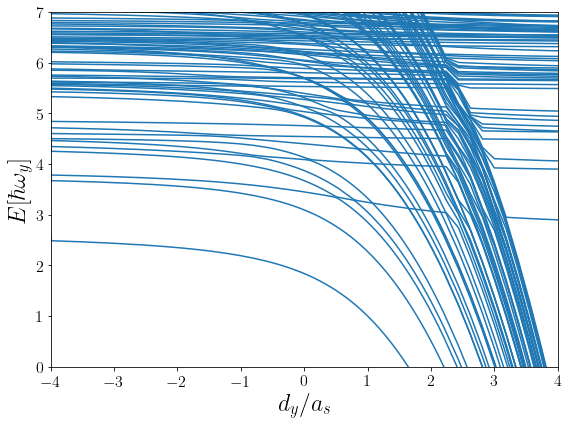

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(least_bound_pos, least_bound_pos + 140):
    ax.plot(x, dic['nivel_{}'.format(i)]/wy, 'C0')
#ax.plot(x, dic['nivel_1002']/wy, 'r')
ax.set_ylim(0, 7)
ax.set_xlim(-4, 4)
ax.set_xlabel('$d_{y}/a_s$')
ax.set_ylabel('$E[\hbar \omega_{y}]$')
plt.tight_layout()
#fig.savefig('Results/Figures/Ix6042_LiLi_3d_1d_Easc.png', dpi=200)
plt.show()

In [13]:
%matplotlib inline

## Resonance x>1

1002
1003
1004
1005
1006
1007
1008
1009
1010
1011


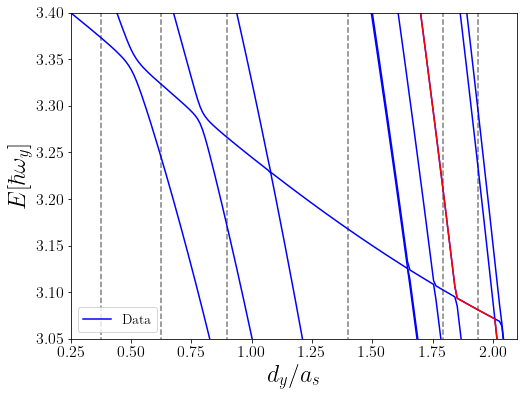

In [14]:
fig2, ax2 = plt.subplots(figsize=(8,6))
xpol = np.linspace(x[0], x[-1], num=50)
for i in range(least_bound_pos+2, least_bound_pos + 12):
    print(i)
    ax2.plot(x, dic['nivel_{}'.format(i)]/wy, 'b')
ax2.plot(x, dic['nivel_1009']/wy, 'r')
ax2.vlines(x[200], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[177], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[150], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[100], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[60], 0, 10, alpha=0.5, linestyles='--')
ax2.vlines(x[45], 0, 10, alpha=0.5, linestyles='--')
ax2.set_ylim(3.05, 3.40)
ax2.set_xlim(0.25, 2.1)
ax2.set_xlabel('$d_{y}/a_s$')
ax2.set_ylabel('$E[\hbar \omega_{y}]$')
ax2.legend(['Data'], fontsize=14)
#plt.savefig('Results/Figures/Ix4993_Iy4993_Iz4993_Easc_Zoom.png', dpi=200)
plt.show()

In [15]:
print('''f Eigenstates:
1002: trap
1003: (0,2,0) ICIR
1004: (2,0,0) ICIR
1005: (0,0,4)
1006: (0,0,6)
1007: (0,2,2)
1008: (2,0,2) 
1009: (0,4,0) ICIR
1010: None
1011: (4,0,0)
1012: (2,2,0) ICIR
''')

f Eigenstates:
1002: trap
1003: (0,2,0) ICIR
1004: (2,0,0) ICIR
1005: (0,0,4)
1006: (0,0,6)
1007: (0,2,2)
1008: (2,0,2) 
1009: (0,4,0) ICIR
1010: None
1011: (4,0,0)
1012: (2,2,0) ICIR



In [16]:
print(f'''To find the eigenstates:
x={x[220]}, delta=0{delta[220]}
x={x[177]}, delta=0{delta[177]}
x={x[150]}, delta=0{delta[150]}
x={x[100]}, delta=0{delta[100]}
x={x[60]}, delta=0{delta[60]}
x={x[45]}, delta=0{delta[45]}
''')

To find the eigenstates:
x=0.1709019735427068, delta=0.71435
x=0.6236593558528052, delta=0.71215
x=0.8979050545010485, delta=0.71080
x=1.398781716951159, delta=0.70830
x=1.7931335608113992, delta=0.70630
x=1.939596870945855, delta=0.70555



In [17]:
%matplotlib inline

# (2,0,0) (0,2,0)

1.1192687358278286e-13


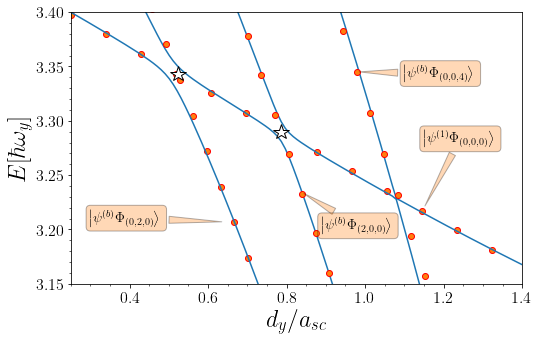

In [18]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1002:
trap_poly = trap_fit(dic, x, x_lims=(0.15, 1.4), y_lims=(3.15, 3.40) ,levels=(1002, 1005), tol=3, wy=wy)/wy
x1002 = np.linspace(0.25, 1.95, num=20)
ax3.scatter(x1002, np.polyval(trap_poly, x1002), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)
ax3.plot(x, dic['nivel_1002']/wy, 'C0', label='Adiabatic', zorder=2)

# nivel 1003:
ax3.plot(x, dic['nivel_1003']/wy, 'C0', zorder=1)
f1003 = np.polyfit(x[(x < 0.80) & (x > 0.60)], np.array(dic['nivel_1002'])[(x < 0.80) & (x > 0.60)]/wy, deg=1)
x1003 = np.linspace(0.25, 1.95, num=50)
ax3.scatter(x1003, np.polyval(f1003, x1003), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1004:
ax3.plot(x, dic['nivel_1004']/wy, 'C0', zorder=1)
f1004 = np.polyfit(x[(x < 0.90) & (x > 0.80)], np.array(dic['nivel_1003'])[(x < 0.90) & (x > 0.80)]/wy, deg=1)
x1004 = np.linspace(0.25, 1.95, num=50)
ax3.scatter(x1004, np.polyval(f1004, x1004), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1005:
ax3.plot(x, dic['nivel_1005']/wy, 'C0', zorder=1)
f1005 = np.polyfit(x[(x < 1.1) & (x > 1)], np.array(dic['nivel_1005'])[(x < 1.1) & (x > 1)]/wy, deg=1)
x1005 = np.linspace(0.25, 1.95, num=50)
ax3.scatter(x1005, np.polyval(f1005, x1005), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f1003), np.polyval(trap_poly, cross_points(trap_poly, f1003)), 'w*', markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f1004), np.polyval(trap_poly, cross_points(trap_poly, f1004)), 'w*', markersize=16, markeredgecolor='k')

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.15, 3.22), xytext=(1.15, 3.28), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,2,0)}\right>$', xy=(0.64, 3.207), xytext=(0.3, 3.207), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,0,0)}\right>$', xy=(0.84, 3.234), xytext=(0.89, 3.2), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,0,4)}\right>$', xy=(0.98, 3.345), xytext=(1.1, 3.34), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(3.15, 3.40)
ax3.set_xlim(0.25, 1.4)
fig3.savefig('Results/Figures/LiLi_1d3d_6042_Easc_Interpolation_200_v2.png', bbox_inches="tight", dpi=200)

In [19]:
print(f'''Crosses between (x, E):
* trap-(0,2,0): ({cross_points(trap_poly, f1003)}, {np.polyval(trap_poly, cross_points(trap_poly, f1003))})
* trap-(2,0,0): ({cross_points(trap_poly, f1004)}, {np.polyval(trap_poly, cross_points(trap_poly, f1004))})
''')

Crosses between (x, E):
* trap-(0,2,0): (0.5221467187575046, 3.342687454684453)
* trap-(2,0,0): (0.7855540371609879, 3.289643093496672)



In [20]:
print(f'''ICIR: asc/dy:
* trap-(0,2,0): {1/cross_points(trap_poly, f1003)} 
* trap-(2,0,0): {1/cross_points(trap_poly, f1004)} 
''')

ICIR: asc/dy:
* trap-(0,2,0): 1.9151705144860252 
* trap-(2,0,0): 1.2729869018483122 



# $$(4,0,0) (0,4,0)$$

7.53218798686005e-14


(1.8, 2.05)

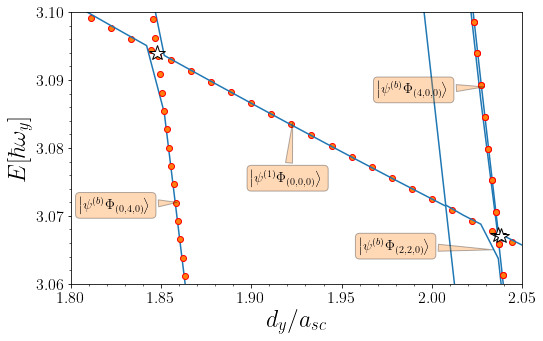

In [27]:
fig3, ax3 = plt.subplots(figsize=aursize)
# nivel 1008:
ax3.plot(x, dic['nivel_1008']/wy, 'C0', zorder=1)
trap_poly = trap_fit(dic, x, x_lims=(1, 2), y_lims=(2.95, 3.35) ,levels=(1008, 1011), tol=1, wy=wy)/wy
x1008 = np.linspace(1, 2.1, num=100)
ax3.scatter(x1008, np.polyval(trap_poly, x1008), edgecolor='r', facecolor='C1', label='Diabatic', zorder=1)

# nivel 1009:
ax3.plot(x, dic['nivel_1009']/wy, 'C0', zorder=1)
f1009 = np.polyfit(x[(x < 1.85) & (x > 1.8)], np.array(dic['nivel_1009'])[(x < 1.85) & (x > 1.8)]/wy, deg=1)
x1009 = np.linspace(1.8, 1.9, num=80)
ax3.scatter(x1009, np.polyval(f1009, x1009), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1010:
ax3.plot(x, dic['nivel_1010']/wy, 'C0', zorder=1)

# nivel 1011:
ax3.plot(x, dic['nivel_1011']/wy, 'C0', zorder=1)
f1011 = np.polyfit(x[(x < 1.97) & (x > 1.95)], np.array(dic['nivel_1011'])[(x < 1.97) & (x > 1.95)]/wy, deg=1)
x1011 = np.linspace(1.9, 2.1, num=100)
ax3.scatter(x1011, np.polyval(f1011, x1011), edgecolor='r', facecolor='C1', zorder=2)

# nivel 1012:
ax3.plot(x, dic['nivel_1012']/wy, 'C0', zorder=1)
f1012 = np.polyfit(x[(x < 1.97) & (x > 1.95)], np.array(dic['nivel_1012'])[(x < 1.97) & (x > 1.95)]/wy, deg=1)
x1012 = np.linspace(1.9, 2.1, num=100)
ax3.scatter(x1012, np.polyval(f1012, x1012), edgecolor='r', facecolor='C1', zorder=2)

# Crosses:
##########
ax3.plot(cross_points(trap_poly, f1009), np.polyval(trap_poly, cross_points(trap_poly, f1009)), 'w*',\
         markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f1011), np.polyval(trap_poly, cross_points(trap_poly, f1011)), 'w*',\
         markersize=16, markeredgecolor='k', label='ICIR')
ax3.plot(cross_points(trap_poly, f1012), np.polyval(trap_poly, cross_points(trap_poly, f1012)), 'w*',\
         markersize=16, markeredgecolor='k')

# States:
#########
ax3.annotate(r'$\left|\psi^{(1)} \Phi_{(0,0,0)}\right>$', xy=(1.923, 3.084), xytext=(1.9, 3.075), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(0,4,0)}\right>$', xy=(1.86, 3.072), xytext=(1.805, 3.071), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(4,0,0)}\right>$', xy=(2.03, 3.089), xytext=(1.97, 3.088), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.annotate(r'$\left|\psi^{(b)} \Phi_{(2,2,0)}\right>$', xy=(2.035, 3.065), xytext=(1.96, 3.065), fontsize=14, 
             bbox=dict(boxstyle="round", alpha=0.3, facecolor='C1'),
             arrowprops=dict(arrowstyle="wedge, tail_width=0.5", alpha=0.3, facecolor='C1'))

ax3.set_xlabel('$d_{y}/a_{sc}$')
ax3.set_ylabel('$E[\hbar \omega_{y}]$')
ax3.xaxis.set_minor_locator(AutoMinorLocator())
ax3.yaxis.set_minor_locator(AutoMinorLocator())
ax3.set_ylim(3.06, 3.1)
ax3.set_xlim(1.80, 2.05)
#fig3.savefig('Results/Figures/LiLi_1d3d_6042_Easc_Interpolation_400_v2.png', bbox_inches="tight", dpi=200)

In [28]:
print(f'''Crosses between (x, E):
* trap-(0,4,0): ({cross_points(trap_poly, f1009)}, {np.polyval(trap_poly, cross_points(trap_poly, f1009))})
* trap-(4,0,0): ({cross_points(trap_poly, f1011)}, {np.polyval(trap_poly, cross_points(trap_poly, f1011))})
* trap-(2,2,0): ({cross_points(trap_poly, f1012)}, {np.polyval(trap_poly, cross_points(trap_poly, f1012))})
''')

Crosses between (x, E):
* trap-(0,4,0): (1.8478904627891293, 3.0939709640207753)
* trap-(4,0,0): (2.0367911862606856, 3.067250334384)
* trap-(2,2,0): (2.038113625131083, 3.0670632710492294)



In [29]:
print(f'''ICIR: asc/dy:
* trap-(0,4,0): {1/cross_points(trap_poly, f1009)} 
* trap-(4,0,0): {1/cross_points(trap_poly, f1011)} 
* trap-(2,2,0): {1/cross_points(trap_poly, f1012)}
''')

ICIR: asc/dy:
* trap-(0,4,0): 0.5411576173679913 
* trap-(4,0,0): 0.49096834606589446 
* trap-(2,2,0): 0.4906497791239113

